# learn.fine_tune()

Here we are doing to discuss about what `learn.fine_tune()` is.

First we can run a model with `fine_tune()`. Then we can discuss aboyt it.

In [2]:
from fastai2.vision.all import *

In [3]:
im_path = untar_data(URLs.PETS)

In [5]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.3),
    item_tfms=Resize(224),
    get_y=lambda p: re.sub('_.*', '', p.name)
)

In [6]:
dls = db.dataloaders(im_path/"images")

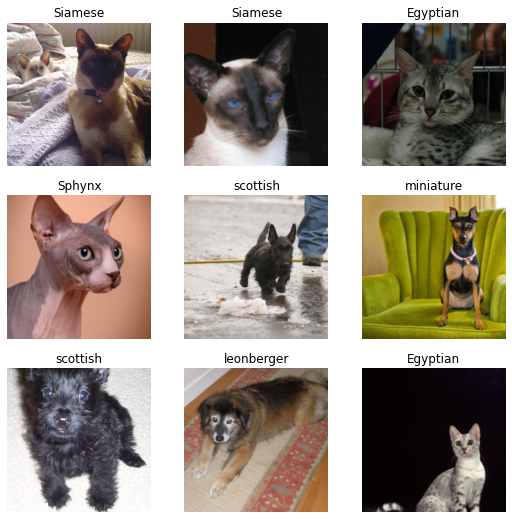

In [7]:
dls.show_batch()

In [15]:
## As you can see, there are 35 types of PETS available
dls.vocab

(#35) ['Abyssinian','Bengal','Birman','Bombay','British','Egyptian','Maine','Persian','Ragdoll','Russian'...]

## Use fine_tune()

In [59]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

(0.012022644281387329, 0.005248074419796467)

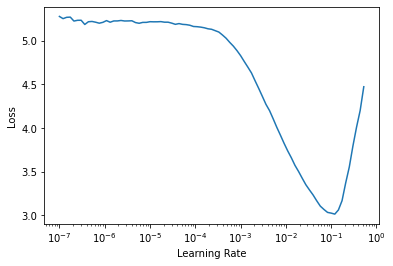

In [60]:
learn.lr_find()

In [61]:
learn.fine_tune(4, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.307668,0.318490,0.098782,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.410514,0.382059,0.117276,00:24
1,0.342685,0.361166,0.101489,00:24
2,0.186597,0.274276,0.074876,00:24
3,0.089321,0.241070,0.066306,00:23


## Let's Recontruct fine_tune() by hand

In [63]:
learn2 = cnn_learner(dls, resnet34, metrics=error_rate)

In [62]:
## Let's get the source code fine_tune.
learn2.fine_tune??

In [64]:
learn2.freeze()

### What's `learn.freeze()`?

With transfer learning, fastai removes the last layer of the model (resnet34) and put a layer matching for our categories. Which gives us 35 activations(We have 35 categories).

So, those weights are random. It will be great, if we can give some better values for those. That's what we do with **freeze**

**It will freeze update weights for all the layers except for the last layer.**

In [65]:
learn2.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.900142,0.264001,0.087957,00:18


In [66]:
## This will undo learn.freeze()
learn2.unfreeze()

In [67]:
learn2.fit_one_cycle(4, slice(3e-5, 3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.573110,0.954845,0.230492,00:24
1,0.537520,0.444491,0.118178,00:24
2,0.238241,0.280143,0.086152,00:24
3,0.104778,0.251117,0.069012,00:24


### What's `slice(3e-5, 3e-3)`

Basically, we have an already optimized model for identifying images. 
With transfer learning, we know that first few layers are very good at finding data in images.
So, we don't need to train them a lot.

That's why we use a range here, first one (3e-5) is the learning rate we are given to the first layer. 3e-3 will be given to the last layer.

All the others are getting some in middle.

**Wait..**

If you have noticed, It seems like `fine_tune()` is still better than this.
So, we have dig more into that.
That's for another day :D 

## Let's try to train with fit instead

In [45]:
learn3 = cnn_learner(dls, resnet34, metrics=error_rate)

In [46]:
learn3.freeze()

In [47]:
learn3.fit(1, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.662028,0.290773,0.092467,00:18


In [48]:
learn3.unfreeze()

In [49]:
learn3.fit(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,4.290647,10.549358,0.937303,00:23
1,4.019990,3.323328,0.907533,00:24
2,3.775161,6.827188,0.923320,00:23
3,3.635330,10.082062,0.843031,00:24


**As you already seen, `fit()` is extremly slow.**

So, `fit_one_cycle` is much better. We can [learn about it here](https://docs.fast.ai/callbacks.one_cycle.html).

But it's bit harder for wit the stuff we know. So, we should do it in another day.

## May be we can do this with freezed

In [50]:
learn4 = cnn_learner(dls, resnet34, metrics=error_rate)

In [51]:
learn4.freeze()

In [52]:
learn4.fit(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.677760,0.334623,0.112314,00:18
1,0.402688,0.296197,0.092016,00:18
2,0.320308,0.308953,0.087957,00:18
3,0.253021,0.300050,0.082093,00:18


**Wow. We can get much better result even with `fit` by just freezing**

That's why we should experiment.

## Let's try same techinique with `fit_one_cycle`

In [56]:
learn5 = cnn_learner(dls, resnet34, metrics=error_rate)

In [57]:
learn5.freeze()

In [58]:
learn5.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.276709,0.313620,0.101489,00:18
1,0.560824,0.364346,0.114118,00:19
2,0.317255,0.242433,0.071719,00:18
3,0.190268,0.229625,0.073072,00:18


**So, it seems like `fine_tune()` still gives us much better result.**